In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import Sastrawi
from wordcloud import WordCloud
import numpy as np

In [2]:
df = pd.read_csv('Dataset_awal_myIM3.csv')
df

,userName,content,score,at,appVersion
0,UCIL OLOL LEHO [UOL],Kenapa Indosat ada tuyulnya sekarang pulsa tib...,1,2024-02-02 05:17:07,82.0.5
1,Pp.joaana,aplikasi ini sangat bagus,5,2024-02-02 05:16:51,82.0.5
2,Xeraphine,Tolong itu sistem login nomor utama dan nomor ...,3,2024-02-02 05:13:29,NaN
3,Sugeng dian pamungkas,Sekarang pilihanya yg 30 hari naik terus harga...,4,2024-02-02 05:13:07,NaN
4,Bang Tinus,murah,5,2024-02-02 05:11:20,81.16.0
...,...,...,...,...,...
9995,Banes Sugianto',ni beneran gabiss log in ke app?,1,2024-01-07 15:48:54,81.14.2
9996,ikhlas project,"Gak bisa ngunci pulsa save, data jalan pulsa p...",1,2024-01-07 15:45:18,82.0.2
9997,Fredi Apriyansah,"mohon maaf ini, knp makin hari provider satu i...",1,2024-01-07 15:44:18,NaN
9998,RRQ anan,Masih sering gangguan,5,2024-01-07 15:40:12,82.0.2


In [3]:
df.drop(columns = ['userName', 'at', 'appVersion'], inplace = True)
df.columns = ['content', 'score']
df

,content,score
0,Kenapa Indosat ada tuyulnya sekarang pulsa tib...,1
1,aplikasi ini sangat bagus,5
2,Tolong itu sistem login nomor utama dan nomor ...,3
3,Sekarang pilihanya yg 30 hari naik terus harga...,4
4,murah,5
...,...,...
9995,ni beneran gabiss log in ke app?,1
9996,"Gak bisa ngunci pulsa save, data jalan pulsa p...",1
9997,"mohon maaf ini, knp makin hari provider satu i...",1
9998,Masih sering gangguan,5


In [4]:
df.dtypes

content    object
score       int64
dtype: object

In [5]:
df.isnull().sum()

content    0
score      0
dtype: int64

In [6]:
df.duplicated().sum()

2137

In [7]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [8]:
label = []
for index, row in df.iterrows():
    if row["score"] == 1 or row["score"] == 2 or row["score"] == 3:
        label.append(0)
    else:
        label.append(1)

df["label"] = label

In [9]:
df

,content,score,label
0,Kenapa Indosat ada tuyulnya sekarang pulsa tib...,1,0
1,aplikasi ini sangat bagus,5,1
2,Tolong itu sistem login nomor utama dan nomor ...,3,0
3,Sekarang pilihanya yg 30 hari naik terus harga...,4,1
4,murah,5,1
...,...,...,...
9995,ni beneran gabiss log in ke app?,1,0
9996,"Gak bisa ngunci pulsa save, data jalan pulsa p...",1,0
9997,"mohon maaf ini, knp makin hari provider satu i...",1,0
9998,Masih sering gangguan,5,1


C:\Users\Sida Nanda\AppData\Local\Temp\ipykernel_28656\311028237.py:5: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  score_counts = pd.value_counts(df["label"], sort=True)


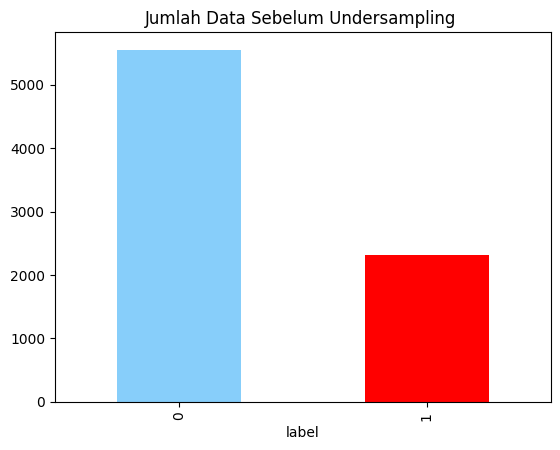

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Menghitung jumlah data yang bernilai 1 dan 0 pada kolom 'label'
score_counts = pd.value_counts(df["label"], sort=True)

# Membuat plot bar
score_counts.plot(kind='bar', color=['lightskyblue', 'red'])

# Menyertakan judul plot
plt.title("Jumlah Data Sebelum Undersampling ")

# Menampilkan plot
plt.show()

In [11]:
# Menghitung jumlah data yang bernilai 1 dan 0 pada kolom 'label'
score_counts_counts = df["label"].value_counts()

# Menampilkan jumlah data untuk setiap nilai dalam kolom 'label'
print(score_counts)

label
0    5551
1    2312
Name: count, dtype: int64


In [12]:
from imblearn.under_sampling import RandomUnderSampler

# Inisialisasi RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)

# Melakukan undersampling pada data
X_resampled, y_resampled = undersampler.fit_resample(df.drop("label", axis=1), df["label"])

# Membuat DataFrame baru dari data yang telah di-resample
df_resampled = pd.DataFrame(X_resampled, columns=df.columns.drop("label"))
df_resampled["label"] = y_resampled

# Menampilkan jumlah data untuk setiap nilai dalam kolom 'diabetes' yang telah di-resample
print(df_resampled["label"].value_counts())

label
0    2312
1    2312
Name: count, dtype: int64


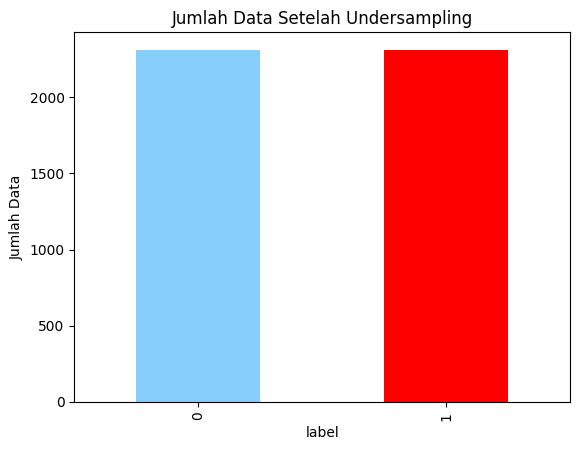

In [13]:
import matplotlib.pyplot as plt

# Menampilkan jumlah data untuk setiap nilai dalam kolom 'label' yang telah di-resample dalam bentuk grafik batang
df_resampled["label"].value_counts().plot(kind="bar", color=["lightskyblue", "red"])

# Menyertakan judul plot
plt.title("Jumlah Data Setelah Undersampling")

# Menyertakan label untuk sumbu x
plt.xlabel("label")

# Menyertakan label untuk sumbu y
plt.ylabel("Jumlah Data")

# Menampilkan plot
plt.show()

In [14]:
df_resampled

,content,score,label
3149,Sinyal jelek banget. Padahal kuota 32GB. Parah...,1,0
9361,"Sangat buruk kekuatan sinyal nya, kami kecewa ...",1,0
7704,Saya top up/isi ulang pulsa gagal/pulsa tidak ...,1,0
450,Buka Aplikasi MyIM3 sering gangguan,1,0
5918,"Aplikasi ny sangat buruk, masa ngisi pulsa kad...",1,0
...,...,...,...
9972,MuantaaaaP,5,1
9974,sngt bgus,5,1
9978,mantap kaliiiiiiiiii.........,5,1
9983,Ini ngak jelk ko biasa ajah dari jarigan oke n...,5,1


In [15]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler

df_resampled.to_csv('undersampling_data.csv', index=False)

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import Sastrawi
from wordcloud import WordCloud
import numpy as np
df = pd.read_csv('undersampling_data.csv')
df

,content,score,label
0,Sinyal jelek banget. Padahal kuota 32GB. Parah...,1,0
1,"Sangat buruk kekuatan sinyal nya, kami kecewa ...",1,0
2,Saya top up/isi ulang pulsa gagal/pulsa tidak ...,1,0
3,Buka Aplikasi MyIM3 sering gangguan,1,0
4,"Aplikasi ny sangat buruk, masa ngisi pulsa kad...",1,0
...,...,...,...
4619,MuantaaaaP,5,1
4620,sngt bgus,5,1
4621,mantap kaliiiiiiiiii.........,5,1
4622,Ini ngak jelk ko biasa ajah dari jarigan oke n...,5,1


In [17]:
import re

# Fungsi untuk membersihkan teks
def clean_text(text):
    # Mengubah teks menjadi huruf kecil
    text = text.lower()
    # Menghapus angka
    text = re.sub(r'\d+', '', text)
    # Menghapus karakter khusus dan tanda baca kecuali spasi
    text = re.sub(r'[^\w\s]', '', text)
    # Menghapus spasi ekstra
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Menerapkan fungsi clean_text ke setiap baris dalam kolom 'content'
df['content'] = df['content'].apply(lambda x: clean_text(str(x)))

In [18]:
norm = {" dgn " : " dengan ", " gue ": " saya ", " dgn ":" dengan ", "bgmn ":" bagaimana ", ' tdk':' tidak ', ' blum ':' belum ', 'mantaaaaaaaappp':' bagus ', ' josss ':' bagus ', ' thanks ': ' terima kasih ', 'fast':' cepat ', ' dg ':' dengan ', 'trims':' terima kasih ', 'brg':' barang ', 'gx':' tidak ', ' dgn ':' dengan ', ' recommended':' rekomen ', 'recomend':' rekomen ', 'good':' bagus '}

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))

In [19]:
df

,content,score,label
0,sinyal jelek banget padahal kuota gb parah men...,1,0
1,sangat buruk kekuatan sinyal nya kami kecewa d...,1,0
2,saya top upisi ulang pulsa gagalpulsa tidak ma...,1,0
3,buka aplikasi myim sering gangguan,1,0
4,aplikasi ny sangat buruk masa ngisi pulsa kada...,1,0
...,...,...,...
4619,muantaaaap,5,1
4620,sngt bgus,5,1
4621,mantap kaliiiiiiiiii,5,1
4622,ini ngak jelk ko biasa ajah dari jarigan oke n...,5,1


In [20]:

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text


df['content'] = df['content'].apply(lambda x: stopword(x))

In [21]:
df

,content,score,label
0,sinyal jelek banget padahal kuota gb parah men...,1,0
1,sangat buruk kekuatan sinyal nya kecewa im yg ...,1,0
2,top upisi ulang pulsa gagalpulsa masuk padahal...,1,0
3,buka aplikasi myim sering gangguan,1,0
4,aplikasi ny sangat buruk masa ngisi pulsa kada...,1,0
...,...,...,...
4619,muantaaaap,5,1
4620,sngt bgus,5,1
4621,mantap kaliiiiiiiiii,5,1
4622,ngak jelk ko biasa ajah jarigan oke ngak yg be...,5,1


In [22]:
tokenized = df['content'].apply(lambda x:x.split())
tokenized

0       [sinyal, jelek, banget, padahal, kuota, gb, pa...
1       [sangat, buruk, kekuatan, sinyal, nya, kecewa,...
2       [top, upisi, ulang, pulsa, gagalpulsa, masuk, ...
3                [buka, aplikasi, myim, sering, gangguan]
4       [aplikasi, ny, sangat, buruk, masa, ngisi, pul...
                              ...                        
4619                                         [muantaaaap]
4620                                         [sngt, bgus]
4621                              [mantap, kaliiiiiiiiii]
4622    [ngak, jelk, ko, biasa, ajah, jarigan, oke, ng...
4623                                   [sering, gangguan]
Name: content, Length: 4624, dtype: object

In [23]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(Ulasan):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in Ulasan:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

tokenized = tokenized.apply(stemming)

tokenized.to_csv('databersih2.csv', index=False)
data_clean = pd.read_csv('databersih2.csv', encoding='latin1')
data_clean.head()

sinyal jelek banget padahal kuota gb parah bala
sangat buruk kuat sinyal nya kecewa im yg tahun
top upisi ulang pulsa gagalpulsa masuk padahal aplikasi dana verifikasi bayar succes tpi pulsa masuk malah notif gagal aplikasi myim
buka aplikasi myim sering ganggu
aplikasi ny sangat buruk masa ngisi pulsa kadang pulsa ny kurang sendiri makin update semkin buruk
masalah paling serius harus segera tangan saat jadi hujan teras atau mendung kouta nya jadi melampat padahal jaring nya bagus masalah segera baik
bagus banget bnyk promonya
sinyal tolng dong kencengin
apk nya mas gk di buka percuma download myim
donk verifikasi dipermudahsms verifikasi lama bngtttkenpa gk verifikasi via wa aja dr pd via smssms udh zaman kapan tau msh aja dipake
game panjat kuota gak jelas tiap mau menang langkah nya selalu lebih scam ngabisin kuota doang
indosat sya mau kompelen sya beli paket data harga ribu lewat briva saldo udah potong paket gagal masuk sekarang saldo sya balik
jelek eror mulu muter aja data ne


,content
0,sinyal jelek banget padahal kuota gb parah bala
1,sangat buruk kuat sinyal nya kecewa im yg tahun
2,top upisi ulang pulsa gagalpulsa masuk padahal...
3,buka aplikasi myim sering ganggu
4,aplikasi ny sangat buruk masa ngisi pulsa kada...


In [24]:
at1 = pd.read_csv('databersih2.csv')
at2 = pd.read_csv('undersampling_data.csv')
att2 = at2['label']

result = pd.concat([at1, att2], axis=1)

In [25]:

result.head()

,content,label
0,sinyal jelek banget padahal kuota gb parah bala,0
1,sangat buruk kuat sinyal nya kecewa im yg tahun,0
2,top upisi ulang pulsa gagalpulsa masuk padahal...,0
3,buka aplikasi myim sering ganggu,0
4,aplikasi ny sangat buruk masa ngisi pulsa kada...,0


In [26]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [27]:
Ulasan = result['content']

In [28]:
Ulasan.isnull().sum()

70

In [29]:
Ulasan = Ulasan.fillna('tidak ada komentar')

In [30]:
cv = CountVectorizer()
term_fit = cv.fit(Ulasan)

print(len(term_fit.vocabulary_))

5316


In [31]:

term_fit.vocabulary_

{'sinyal': 4493,
 'jelek': 2057,
 'banget': 433,
 'padahal': 3658,
 'kuota': 2546,
 'gb': 1492,
 'parah': 3714,
 'bala': 409,
 'sangat': 4219,
 'buruk': 816,
 'kuat': 2528,
 'nya': 3514,
 'kecewa': 2271,
 'im': 1819,
 'yg': 5285,
 'tahun': 4704,
 'top': 4965,
 'upisi': 5111,
 'ulang': 5082,
 'pulsa': 3984,
 'gagalpulsa': 1416,
 'masuk': 2979,
 'aplikasi': 249,
 'dana': 1000,
 'verifikasi': 5141,
 'bayar': 504,
 'succes': 4628,
 'tpi': 4977,
 'malah': 2893,
 'notif': 3484,
 'gagal': 1414,
 'myim': 3265,
 'buka': 788,
 'sering': 4394,
 'ganggu': 1451,
 'ny': 3513,
 'masa': 2971,
 'ngisi': 3400,
 'kadang': 2166,
 'kurang': 2561,
 'sendiri': 4371,
 'makin': 2882,
 'update': 5106,
 'semkin': 4355,
 'masalah': 2973,
 'paling': 3692,
 'serius': 4398,
 'harus': 1701,
 'segera': 4299,
 'tangan': 4734,
 'saat': 4162,
 'jadi': 1962,
 'hujan': 1783,
 'teras': 4820,
 'atau': 300,
 'mendung': 3052,
 'kouta': 2500,
 'melampat': 3026,
 'jaring': 2004,
 'bagus': 350,
 'baik': 386,
 'bnyk': 700,
 'promo

In [32]:

# Kolom pertama ini berarti jumlah dokumen
# Kolom kedua berarti letak kata nya
# Kolom ketiga berarti hasil dari tf

term_frequency_all = term_fit.transform(Ulasan)
print(term_frequency_all)

  (0, 409)	1
  (0, 433)	1
  (0, 1492)	1
  (0, 2057)	1
  (0, 2546)	1
  (0, 3658)	1
  (0, 3714)	1
  (0, 4493)	1
  (1, 816)	1
  (1, 1819)	1
  (1, 2271)	1
  (1, 2528)	1
  (1, 3514)	1
  (1, 4219)	1
  (1, 4493)	1
  (1, 4704)	1
  (1, 5285)	1
  (2, 249)	2
  (2, 504)	1
  (2, 1000)	1
  (2, 1414)	1
  (2, 1416)	1
  (2, 2893)	1
  (2, 2979)	2
  (2, 3265)	1
  :	:
  (4616, 2437)	1
  (4616, 2973)	1
  (4616, 3332)	2
  (4616, 3581)	1
  (4616, 5285)	1
  (4617, 1451)	1
  (4617, 4394)	1
  (4618, 15)	1
  (4618, 2451)	1
  (4618, 4906)	1
  (4619, 15)	1
  (4619, 2451)	1
  (4619, 4906)	1
  (4620, 15)	1
  (4620, 2451)	1
  (4620, 4906)	1
  (4621, 15)	1
  (4621, 2451)	1
  (4621, 4906)	1
  (4622, 15)	1
  (4622, 2451)	1
  (4622, 4906)	1
  (4623, 15)	1
  (4623, 2451)	1
  (4623, 4906)	1


In [33]:
ulasan_tf = Ulasan[7]
print(ulasan_tf)

sinyal tolng dong kencengin


In [34]:
term_frequency = term_fit.transform([ulasan_tf])
print(term_frequency)

  (0, 1187)	1
  (0, 2327)	1
  (0, 4493)	1
  (0, 4952)	1


In [35]:
dokumen = term_fit.transform(Ulasan)
tfidf_transformer = TfidfTransformer().fit(dokumen)
print(tfidf_transformer.idf_)

tfidf = tfidf_transformer.transform(term_frequency)
print(tfidf)

[8.74608447 8.74608447 8.74608447 ... 8.34061936 8.74608447 8.74608447]
  (0, 4952)	0.6383257264807202
  (0, 4493)	0.21790202703739422
  (0, 2327)	0.6383257264807202
  (0, 1187)	0.3709437159984195


In [36]:
train_s0 = df[df["label"] == 0]

In [37]:
train_s0["content"] = train_s0["content"].fillna("tidak ada komentar")

C:\Users\Sida Nanda\AppData\Local\Temp\ipykernel_28656\2446275887.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s0["content"] = train_s0["content"].fillna("tidak ada komentar")


In [40]:
train_s0.head()

,content,score,label
0,sinyal jelek banget padahal kuota gb parah men...,1,0
1,sangat buruk kekuatan sinyal nya kecewa im yg ...,1,0
2,top upisi ulang pulsa gagalpulsa masuk padahal...,1,0
3,buka aplikasi myim sering gangguan,1,0
4,aplikasi ny sangat buruk masa ngisi pulsa kada...,1,0


In [41]:
from wordcloud import WordCloud

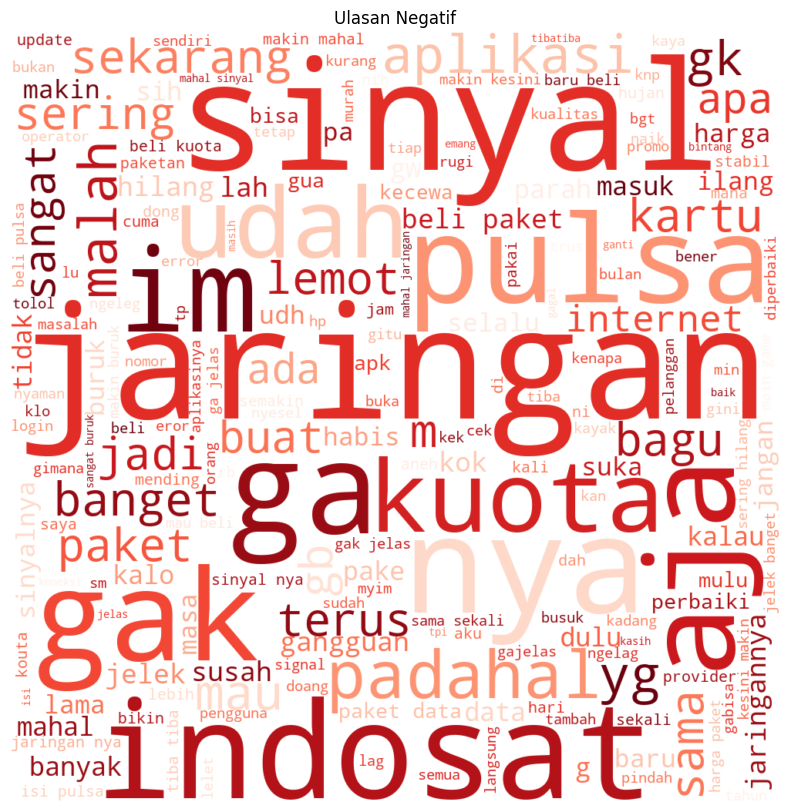

In [42]:

all_text_s0 = ' '.join(word for word in train_s0["content"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Ulasan Negatif")
plt.margins(x=0, y=0)
plt.show()

In [43]:
train_s1 = df[df["label"] == 1]

In [44]:
train_s1["content"] = train_s1["content"].fillna("Tidak ada komentar")

C:\Users\Sida Nanda\AppData\Local\Temp\ipykernel_28656\2441158359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s1["content"] = train_s1["content"].fillna("Tidak ada komentar")


In [45]:
train_s1.head()

,content,score,label
2312,aplikasi sangat bagus,5,1
2313,sekarang pilihanya yg hari naik terus harganya...,4,1
2314,murah,5,1
2315,kadang lemot,4,1
2316,gabdem,5,1


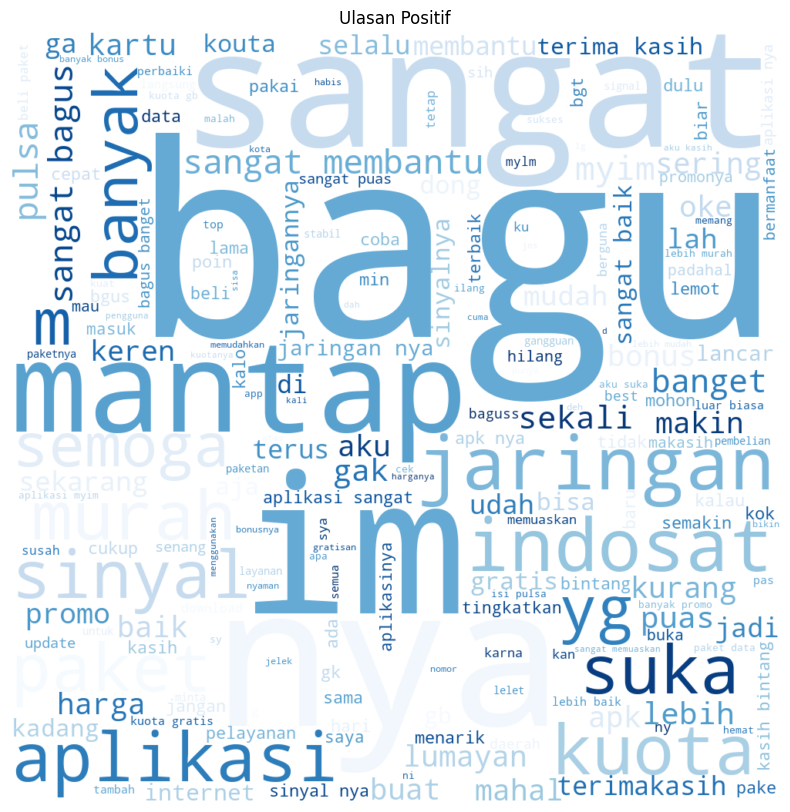

In [46]:
all_text_s1 = ' '.join(word for word in train_s1["content"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode="RGBA", background_color='white').generate(all_text_s1)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Ulasan Positif")
plt.margins(x=0, y=0)
plt.show()

C:\Users\Sida Nanda\AppData\Local\Temp\ipykernel_28656\3715549406.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  sentimen_data = pd.value_counts(df["label"], sort=True)


<function matplotlib.pyplot.show(close=None, block=None)>

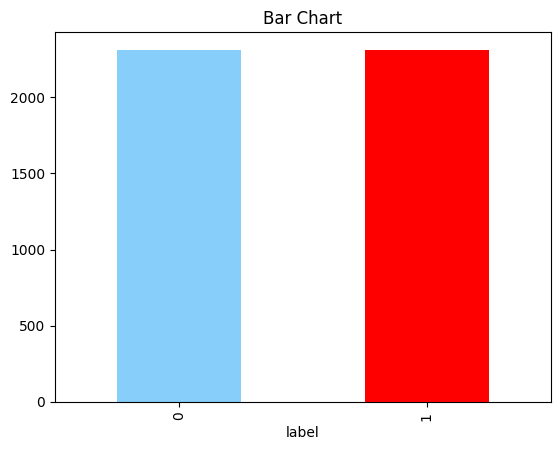

In [47]:
sentimen_data = pd.value_counts(df["label"], sort=True)
sentimen_data.plot(kind='bar', color=['lightskyblue', 'red'])
plt.title("Bar Chart")
plt.show

In [48]:
result['content'] = result['content'].fillna("Tidak ada komentar")

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

# Split data
X_train, X_test, y_train, y_test = train_test_split(result['content'], result['label'], 
test_size=0.2, stratify=result['label'], 
random_state=30)

# Transform data dengan TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Normalisasi fitur
scaler = StandardScaler(with_mean=False)
X_train_tfidf_scaled = scaler.fit_transform(X_train_tfidf)
X_test_tfidf_scaled = scaler.transform(X_test_tfidf)

Percobaan Kernel 

In [50]:
# Linear Kernel
svc_linear = SVC(kernel='linear')
svc_linear.fit(X_train_tfidf_scaled, y_train)
y_pred_linear = svc_linear.predict(X_test_tfidf_scaled)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print("Accuracy for linear kernel: ", accuracy_linear)
print("Classification report for linear kernel:")
print(classification_report(y_test, y_pred_linear))

Accuracy for linear kernel:  0.7697297297297298
Classification report for linear kernel:
              precision    recall  f1-score   support

           0       0.82      0.69      0.75       462
           1       0.73      0.85      0.79       463

    accuracy                           0.77       925
   macro avg       0.78      0.77      0.77       925
weighted avg       0.78      0.77      0.77       925



In [51]:
# Polynomial Kernel
svc_poly = SVC(kernel='poly')
svc_poly.fit(X_train_tfidf_scaled, y_train)
y_pred_poly = svc_poly.predict(X_test_tfidf_scaled)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
print("Accuracy for polynomial kernel: ", accuracy_poly)
print("Classification report for polynomial kernel:")
print(classification_report(y_test, y_pred_poly))

Accuracy for polynomial kernel:  0.5016216216216216
Classification report for polynomial kernel:
              precision    recall  f1-score   support

           0       0.53      0.02      0.04       462
           1       0.50      0.98      0.66       463

    accuracy                           0.50       925
   macro avg       0.51      0.50      0.35       925
weighted avg       0.51      0.50      0.35       925



In [52]:
# RBF Kernel
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_train_tfidf_scaled, y_train)
y_pred_rbf = svc_rbf.predict(X_test_tfidf_scaled)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print("Accuracy for RBF kernel: ", accuracy_rbf)
print("Classification report for RBF kernel:")
print(classification_report(y_test, y_pred_rbf))

Accuracy for RBF kernel:  0.8281081081081081
Classification report for RBF kernel:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       462
           1       0.86      0.79      0.82       463

    accuracy                           0.83       925
   macro avg       0.83      0.83      0.83       925
weighted avg       0.83      0.83      0.83       925



In [53]:
# Sigmoid Kernel
svc_sigmoid = SVC(kernel='sigmoid')
svc_sigmoid.fit(X_train_tfidf_scaled, y_train)
y_pred_sigmoid = svc_sigmoid.predict(X_test_tfidf_scaled)
accuracy_sigmoid = accuracy_score(y_test, y_pred_sigmoid)
print("Accuracy for sigmoid kernel: ", accuracy_sigmoid)
print("Classification report for sigmoid kernel:")
print(classification_report(y_test, y_pred_sigmoid))

Accuracy for sigmoid kernel:  0.8335135135135135
Classification report for sigmoid kernel:
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       462
           1       0.83      0.84      0.83       463

    accuracy                           0.83       925
   macro avg       0.83      0.83      0.83       925
weighted avg       0.83      0.83      0.83       925



In [54]:
# Memilih kernel dengan akurasi terbaik
accuracies = {
    'linear': accuracy_linear,
    'poly': accuracy_poly,
    'rbf': accuracy_rbf,
    'sigmoid': accuracy_sigmoid
}

best_kernel = max(accuracies, key=accuracies.get)
print(f"Best kernel based on accuracy: {best_kernel}")

Best kernel based on accuracy: sigmoid


Hyperparameter Tuning dengan GridSearchCV

In [55]:
if best_kernel == 'linear':
    param_grid = {'C': [0.1, 1, 10, 100, 1000]}
    svc = SVC(kernel='linear')
elif best_kernel == 'poly':
    param_grid = {'C': [0.1, 1, 10, 100, 1000], 'degree': [2, 3, 4, 5], 'coef0': [0, 1]}
    svc = SVC(kernel='poly')
elif best_kernel == 'rbf':
    param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
    svc = SVC(kernel='rbf')
elif best_kernel == 'sigmoid':
    param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'coef0': [0, 1]}
    svc = SVC(kernel='sigmoid')

grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train_tfidf_scaled, y_train)

print(f"Best parameters for {best_kernel} kernel: ", grid_search.best_params_)
best_model = grid_search.best_estimator_

y_pred_tuned = best_model.predict(X_test_tfidf_scaled)
print(f"Tuned classification report for {best_kernel} kernel:")
print(classification_report(y_test, y_pred_tuned))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters for sigmoid kernel:  {'C': 0.1, 'coef0': 0, 'gamma': 0.01}
Tuned classification report for sigmoid kernel:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       462
           1       0.85      0.88      0.86       463

    accuracy                           0.86       925
   macro avg       0.86      0.86      0.86       925
weighted avg       0.86      0.86      0.86       925



K-Fold Cross-Validation

In [58]:
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Inisialisasi model SVM dengan parameter terbaik setelah GridSearchCV
best_svc = SVC(kernel='sigmoid', C=0.1, coef0=0, gamma=0.01)

# Definisikan k-fold cross-validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# List untuk menyimpan laporan klasifikasi dari setiap fold
classification_reports = []

# Lakukan k-fold cross-validation
for train_index, val_index in k_fold.split(X_train_tfidf_scaled):
    X_train_fold, X_val_fold = X_train_tfidf_scaled[train_index], X_train_tfidf_scaled[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Melatih model pada data training fold
    best_svc.fit(X_train_fold, y_train_fold)
    
    # Melakukan prediksi pada data validasi fold
    y_pred_fold = best_svc.predict(X_val_fold)
    
    # Menyimpan laporan klasifikasi dari setiap fold
    classification_report_fold = classification_report(y_val_fold, y_pred_fold)
    classification_reports.append(classification_report_fold)

# Menampilkan laporan klasifikasi dari setiap fold
for i, report in enumerate(classification_reports):
    print(f"Classification Report for Fold {i+1}:\n{report}")

Classification Report for Fold 1:
              precision    recall  f1-score   support

           0       0.90      0.81      0.85       384
           1       0.81      0.90      0.85       356

    accuracy                           0.85       740
   macro avg       0.86      0.85      0.85       740
weighted avg       0.86      0.85      0.85       740

Classification Report for Fold 2:
              precision    recall  f1-score   support

           0       0.87      0.80      0.83       372
           1       0.81      0.88      0.85       368

    accuracy                           0.84       740
   macro avg       0.84      0.84      0.84       740
weighted avg       0.84      0.84      0.84       740

Classification Report for Fold 3:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       342
           1       0.83      0.85      0.84       398

    accuracy                           0.83       740
   macro avg       0.83   

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import numpy as np

# Membuat vektor fitur menggunakan TF-IDF pada data latih
vectorizer = TfidfVectorizer(decode_error='replace', encoding='utf-8')
X_train = vectorizer.fit_transform(result['content'])
y_train = result['label']

# Inisialisasi model SVM dengan kernel sigmoid dan parameter terbaik
best_svc = SVC(kernel='sigmoid', C=0.1, coef0=0, gamma=0.01)

# Melatih model SVM
best_svc.fit(X_train, y_train)

def evaluate_text(text):
    # Mengonversi teks input menjadi vektor fitur menggunakan TF-IDF
    input_vector = vectorizer.transform([text])

    # Melakukan prediksi menggunakan model SVM
    prediction = best_svc.predict(input_vector)

    # Menampilkan hasil prediksi
    if prediction[0] == 1:
        return "Teks yang dimasukkan adalah POSITIF."
    else:
        return "Teks yang dimasukkan adalah NEGATIF."

# Memasukkan teks yang ingin dievaluasi secara manual
input_text = input("Masukkan teks yang ingin dievaluasi: ")

# Menampilkan hasil evaluasi
print(evaluate_text(input_text))

Teks yang dimasukkan adalah POSITIF.


In [78]:
import joblib

# Simpan model SVM
joblib.dump(best_model, 'svm_model.pkl')

# Simpan vektor TF-IDF
joblib.dump(tfidf_vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']